# Big Data Real-Time Analytics with Python and Spark

## Chapter 4 -  Exercises

Time for some practice. Solve the following questions and consult the Python documentation if necessary! 

The solution will be presented in the next chapter.

In [1]:
# Python version
from platform import python_version
print('The version used in this notebook is: ', python_version())

The version used in this notebook is:  3.8.13


In [2]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [4]:
%reload_ext watermark
%watermark -a "Bianca Amorim" --iversions

Author: Bianca Amorim

seaborn   : 0.11.2
matplotlib: 3.4.3
pandas    : 1.4.2
numpy     : 1.22.3



In [5]:
# The dataset contains records of taxi runs
df = pd.read_csv('datasets/dataframe.csv', parse_dates = ['Data'], usecols = list(range(0,6)))

In [6]:
df.dtypes

Data          datetime64[ns]
Distancia            float64
Tempo                 object
Segundos             float64
Minutos              float64
Min_Por_Km           float64
dtype: object

In [7]:
df.sort_index(inplace = True)
df.sample(10)

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
17,2015-08-19,1.37,NaN,NaN,NaN,NaN
23,2015-08-24,3.00,NaN,NaN,NaN,NaN
3,2015-08-06,2.38,NaN,NaN,NaN,NaN
49,2015-10-18,1.37,NaN,NaN,NaN,NaN
6,2015-08-09,2.50,NaN,NaN,NaN,NaN
74,2015-12-22,3.10,0:28:00,1680.0,28.000000,9.032258
65,2015-11-28,3.00,NaN,NaN,NaN,NaN
10,2015-08-13,2.35,0:17:25,1045.0,17.416667,7.411348
55,2015-11-04,3.05,0:22:12,1332.0,22.200000,7.278689
12,2015-08-14,0.90,0:06:16,376.0,6.266667,6.962963


#### Exercise 1 - What is the maximum value of the Minutes column?

In [8]:
max_minutes = df['Minutos'].max()
max_minutes

260.71666666666664

#### Exercise 2 - What is the minimum distance value above 2.0?

In [9]:
min_distance = df[df['Distancia'] > 2.0]['Distancia'].min()
min_distance

2.01

#### Exercise 3 - Create a plot with the cumulative frequency of the Distance column.

<AxesSubplot:xlabel='Distancia', ylabel='Count'>

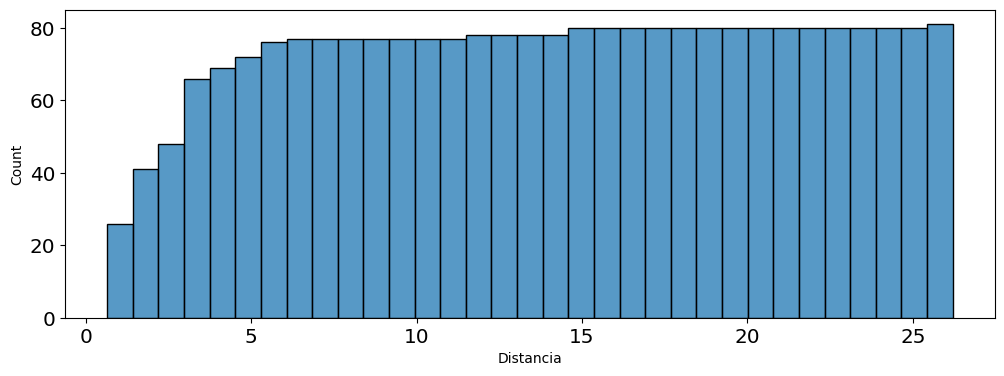

In [10]:
dist_cumulative_freq = sns.histplot(df['Distancia'], cumulative = True)
dist_cumulative_freq

####  Exercise 4 - What is the day of the week at position index zero?

In [11]:
df.head()

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
0,2015-08-02,1.70,NaN,NaN,NaN,NaN
1,2015-08-03,1.40,NaN,NaN,NaN,NaN
2,2015-08-04,2.10,NaN,NaN,NaN,NaN
3,2015-08-06,2.38,NaN,NaN,NaN,NaN
4,2015-08-07,2.30,NaN,NaN,NaN,NaN


In [12]:
df['Data'][0]

Timestamp('2015-08-02 00:00:00')

In [13]:
type(df['Data'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
pd.Timestamp(df['Data'][0]).day_name()

'Sunday'

In [15]:
# with ''%timeit' we can saw that with strftime is more performative. 
df.Data[0].strftime("%A")

'Sunday'

**Documentamentation about strftime**
- https://docs.python.org/3/library/datetime.html
- https://strftime.org/

#### Exercise 5 - What day of the week in the indexes in the top 5 positions?

In [16]:
i = 0
for i in range(0,5):
    print(i, pd.Timestamp(df['Data'][i]).day_name())

0 Sunday
1 Monday
2 Tuesday
3 Thursday
4 Friday


In [17]:
df.Data.map(lambda x: x.strftime("%A")).head()

0      Sunday
1      Monday
2     Tuesday
3    Thursday
4      Friday
Name: Data, dtype: object

#### Exercise 6 - Extract all the days of the week (in text format) and insert them in a new column in the dataframe df.

In [18]:
df.insert(1, column = 'Dia da Semana', value = df.Data.map(lambda x: x.strftime('%A')))
df.head(10)

,Data,Dia da Semana,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
0,2015-08-02,Sunday,1.70,NaN,NaN,NaN,NaN
1,2015-08-03,Monday,1.40,NaN,NaN,NaN,NaN
2,2015-08-04,Tuesday,2.10,NaN,NaN,NaN,NaN
3,2015-08-06,Thursday,2.38,NaN,NaN,NaN,NaN
4,2015-08-07,Friday,2.30,NaN,NaN,NaN,NaN
5,2015-08-08,Saturday,3.40,NaN,NaN,NaN,NaN
6,2015-08-09,Sunday,2.50,NaN,NaN,NaN,NaN
7,2015-08-10,Monday,3.36,0:28:37,1717.0,28.616667,8.516865
8,2015-08-11,Tuesday,1.67,0:13:07,787.0,13.116667,7.854291
9,2015-08-12,Wednesday,1.42,0:10:35,635.0,10.583333,7.453052


#### Exercise 7 - Create a bar graph with the total distance traveled on each day of the week.

In [19]:
total_distance_week = df.groupby(['Dia da Semana']).agg({'Distancia': 'sum'}).reset_index()
total_distance_week.columns = ["Dia da Semana", "Distancia Total"]
total_distance_week

,Dia da Semana,Distancia Total
0,Friday,50.52
1,Monday,26.65
2,Saturday,41.79
3,Sunday,45.45
4,Thursday,26.52
5,Tuesday,36.50
6,Wednesday,26.71


In [20]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_distance_week['Dia da Semana'] = pd.Categorical(total_distance_week['Dia da Semana'],
                                                      categories = cats,
                                                      ordered = True)
total_distance_week = total_distance_week.sort_values('Dia da Semana')
total_distance_week

,Dia da Semana,Distancia Total
1,Monday,26.65
5,Tuesday,36.50
6,Wednesday,26.71
4,Thursday,26.52
0,Friday,50.52
2,Saturday,41.79
3,Sunday,45.45


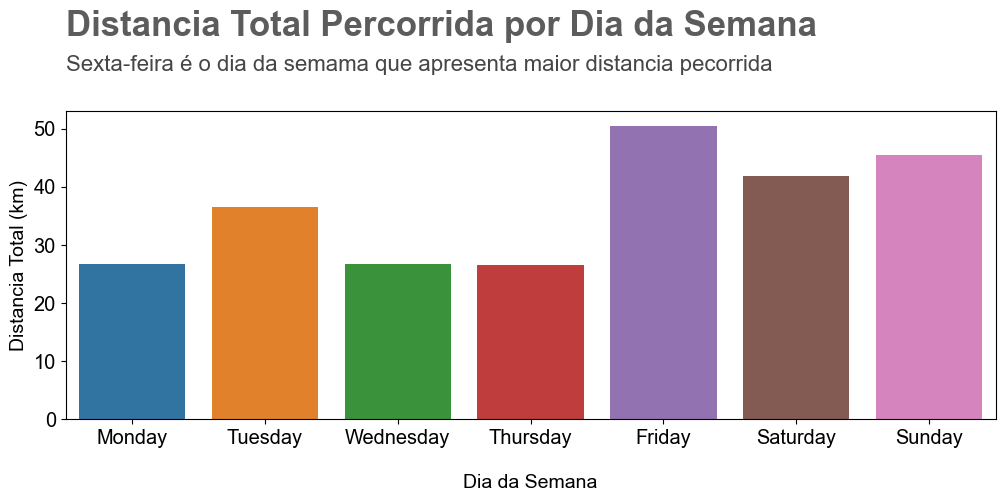

In [21]:
# Graph total distance traveled on each day of the week.

# Picture size
plt.figure(figsize = (12, 4))

# Chart
chart = sns.barplot(x = 'Dia da Semana',
                    y = 'Distancia Total',
                    data = total_distance_week)

# Style and labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
chart.set_xlabel("\nDia da Semana", fontsize = 14)
chart.set_ylabel("Distancia Total (km)", fontsize = 14)


# Add title
chart.text(x = -0.5,
          y = 66,
          s = "Distancia Total Percorrida por Dia da Semana",
          fontsize = 25,
          weight = 'bold',
          alpha = .75)

# Add Subtitle
chart.text(x = -0.5,
          y = 60,
          s = 'Sexta-feira é o dia da semama que apresenta maior distancia pecorrida',
          fontsize = 16,
          alpha = .85);

## Sort and display in proper weekday order

#### Exercise 8 - Delete the Time column from the dataframe df.

In [22]:
df.drop(columns = ['Tempo'], inplace = True)
df.head()

,Data,Dia da Semana,Distancia,Segundos,Minutos,Min_Por_Km
0,2015-08-02,Sunday,1.70,NaN,NaN,NaN
1,2015-08-03,Monday,1.40,NaN,NaN,NaN
2,2015-08-04,Tuesday,2.10,NaN,NaN,NaN
3,2015-08-06,Thursday,2.38,NaN,NaN,NaN
4,2015-08-07,Friday,2.30,NaN,NaN,NaN


#### Exercise 9 - What is the total number of taxi rides per day of the week?

In [29]:
df[df.Distancia > 0].groupby('Dia da Semana').size() 

Dia da Semana
Friday        8
Monday       11
Saturday     15
Sunday       14
Thursday      8
Tuesday      14
Wednesday    11
dtype: int64

#### Exercise 10 - What is the average for each of the columns by day of the week?

In [30]:
df.groupby(['Dia da Semana']).mean()

,Distancia,Segundos,Minutos,Min_Por_Km
Dia da Semana,,,,
Friday,6.315000,5071.800000,84.530000,8.039543
Monday,2.422727,1185.750000,19.762500,7.463840
Saturday,2.786000,1458.500000,24.308333,7.747657
Sunday,3.246429,2802.500000,46.708333,8.184961
Thursday,3.315000,1681.285714,28.021429,7.829348
Tuesday,2.607143,1334.600000,22.243333,7.463291
Wednesday,2.428182,1306.250000,21.770833,7.659706


# The End